## Objective: To help identify product associations and discover relationships between items from the transactional data provided using the association rule learning techniques from the popular Apriori algorithm. This would help provide a pattern and provide further insights into the customer’s buying pattern which may help to optimize inventory management, assist with  cross-selling opportunities, and informing strategic decision-making to ultimately improve profitability.

# Import libraries

In [ ]:
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install mlxtend
!pip install statsmodels


In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Read dataset

In [6]:
# Read dataset, added header rows to dataset
Column_names= ['Date', 'Transaction ID', 'Product']
df=pd.read_csv('https://raw.githubusercontent.com/jhonnovax/Random-Shopping-Cart-Analysis/main/data.csv', header=None, names=Column_names, on_bad_lines='skip')
df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Transaction ID,Product
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


In [ ]:
# Inspect the data. Check dataset dimensions -columns and rows
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(22343, 3)

In [ ]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22343 entries, 0 to 22342
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            22343 non-null  object
 1   Transaction ID  22343 non-null  int64 
 2   Product         22343 non-null  object
dtypes: int64(1), object(2)
memory usage: 523.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Cleaning and Preprocessing

## Check data types

In [ ]:
# Check unique values. This provides more insights and helps us identity the Number of Products (38) in scope, Number of transactions (1139) and time
# period.
df.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date,603
Transaction ID,1139
Product,38


In [7]:
#Transform features - changing Data types.
# Converting the data types of columns - changing Date data type from object to Date format to enable analysis
# Check data types after converting
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date,datetime64[ns]
Transaction ID,int64
Product,object


## Check missing values

In [ ]:
# Inspect the data. Checking for Null values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date,0
Transaction ID,0
Product,0


## Check data mistakes

In [ ]:
# Check product list and detect misspelling sorted in alphabetical order
df['Product'].value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Product,
all- purpose,551
aluminum foil,566
bagels,573
beef,561
butter,555
cereals,591
cheeses,578
coffee/tea,565
dinner rolls,567


## Check Duplicated Values

In [ ]:
df_no_duplicates = df.drop_duplicates()

print("\nComparison:")
print(f"Rows in original dataset: {len(df)}")
print(f"Number of completely duplicate rows: {df.duplicated().sum()}")
print(f"Rows after removing duplicates: {len(df_no_duplicates)}")
print(f"Percentage of duplicate rows: {(1 - len(df_no_duplicates)/len(df))*100:.2f}%")


Comparison:
Rows in original dataset: 22343
Number of completely duplicate rows: 5590
Rows after removing duplicates: 16753
Percentage of duplicate rows: 25.02%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check for duplicate values
print(df[df.duplicated()].shape)
df[df.duplicated()]

(5590, 3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Transaction ID,Product
11,2000-01-01,1,all- purpose
14,2000-01-01,1,all- purpose
19,2000-01-01,1,dinner rolls
31,2000-01-01,2,waffles
33,2000-01-01,2,hand soap
...,...,...,...
22331,2002-02-25,1138,sandwich bags
22332,2002-02-25,1138,toilet paper
22334,2002-02-25,1138,soda
22335,2002-02-25,1138,soda


In [ ]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)
df[df.duplicated()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Transaction ID,Product


# Exploratory Data Analysis

## Statistics summary

In [ ]:
# Statistics summary
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Transaction ID
count,16753,16753.000000
mean,2000-12-20 00:53:38.146003712,573.916612
min,2000-01-01 00:00:00,1.000000
25%,2000-05-27 00:00:00,289.000000
50%,2001-01-29 00:00:00,578.000000
75%,2001-06-18 00:00:00,859.000000
max,2002-02-26 00:00:00,1139.000000
std,NaN,328.495268


The table above provides an overview central tendency of transaction dates and IDs in the dataset. The dates range from 2000-01-01 to 2002-02-26, with the median date being January 30, 2001. The transaction IDs range from 1 to 1139, with mean ID of 573.916612 date of 2000-12-21. This summary can help in understanding the spread and central values in the dataset, which is crucial for further analysis or reporting.

## Inventory Analysis to show trends

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

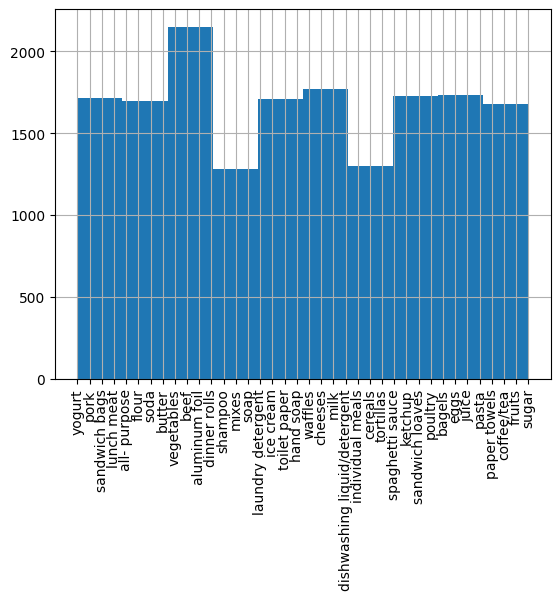

In [ ]:
# Check product demand
df['Product'].hist(xrot=90)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


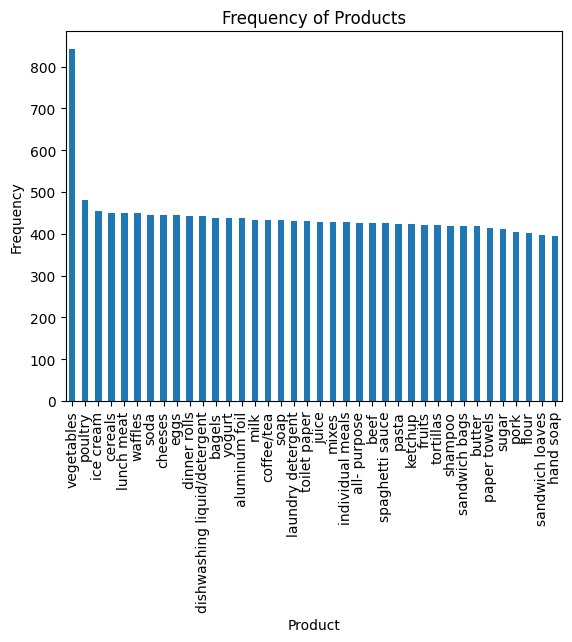

In [ ]:
# Calculate value counts. Visualization for categorical data to get the frequency of each category 'Product'
product_counts = df['Product'].value_counts()

# Plot bar chart
product_counts.plot(kind='bar', rot=90)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Frequency of Products')
plt.show()

The Visual above has identified that VEGETABLES is the product in highest demand as depicted on the frequency chart.
  Other products are showing a almost flat demand levels. HAND SOAP is the least purchased product

In [ ]:
# Below is a tabular representation of the graph above. An Inventory Analysis
# Showing the product list by number of items purchased, in descending order of demand to detect trends (identify most popular products)
# It cleary shows the product with the highest demand and the product with the least demand in the Inventory
df['Product'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Product,
vegetables,842
poultry,480
ice cream,454
cereals,451
lunch meat,450
waffles,449
soda,445
cheeses,445
eggs,444


In [ ]:
# Check number of transactions. Shows statistics about the number of products purchased in each transaction
df['Transaction ID'].value_counts().describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
count,1139.000000
mean,14.708516
std,5.249590
min,4.000000
25%,10.000000
50%,15.000000
75%,19.000000
max,26.000000


INSIGHT FROM THE TABLE ABOVE

We can see based on the statistics above, the average number of products by transaction is around 15, the minimum amount of products is 4 and the maximum amount of products is 26.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x800 with 0 Axes>

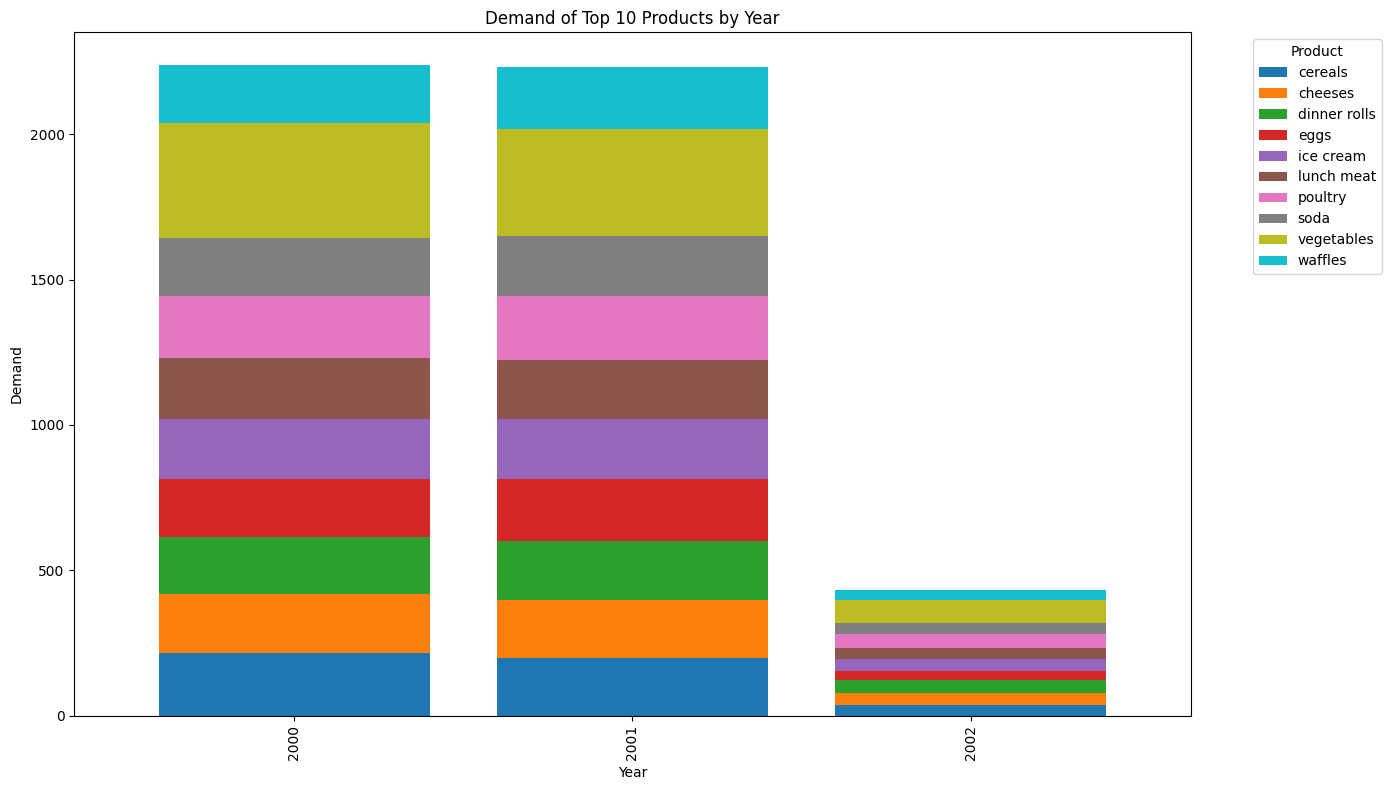

In [ ]:
# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Determine the top 10 products overall
top_products = df['Product'].value_counts().nlargest(10).index

# Filter data to include only the top 10 products
top_product_data = df[df['Product'].isin(top_products)]

# Group by year and product, then count the occurrences
top_product_demand_by_year = top_product_data.groupby(['Year', 'Product']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))
top_product_demand_by_year.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.xlabel('Year')
plt.ylabel('Demand')
plt.title('Demand of Top 10 Products by Year')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x800 with 0 Axes>

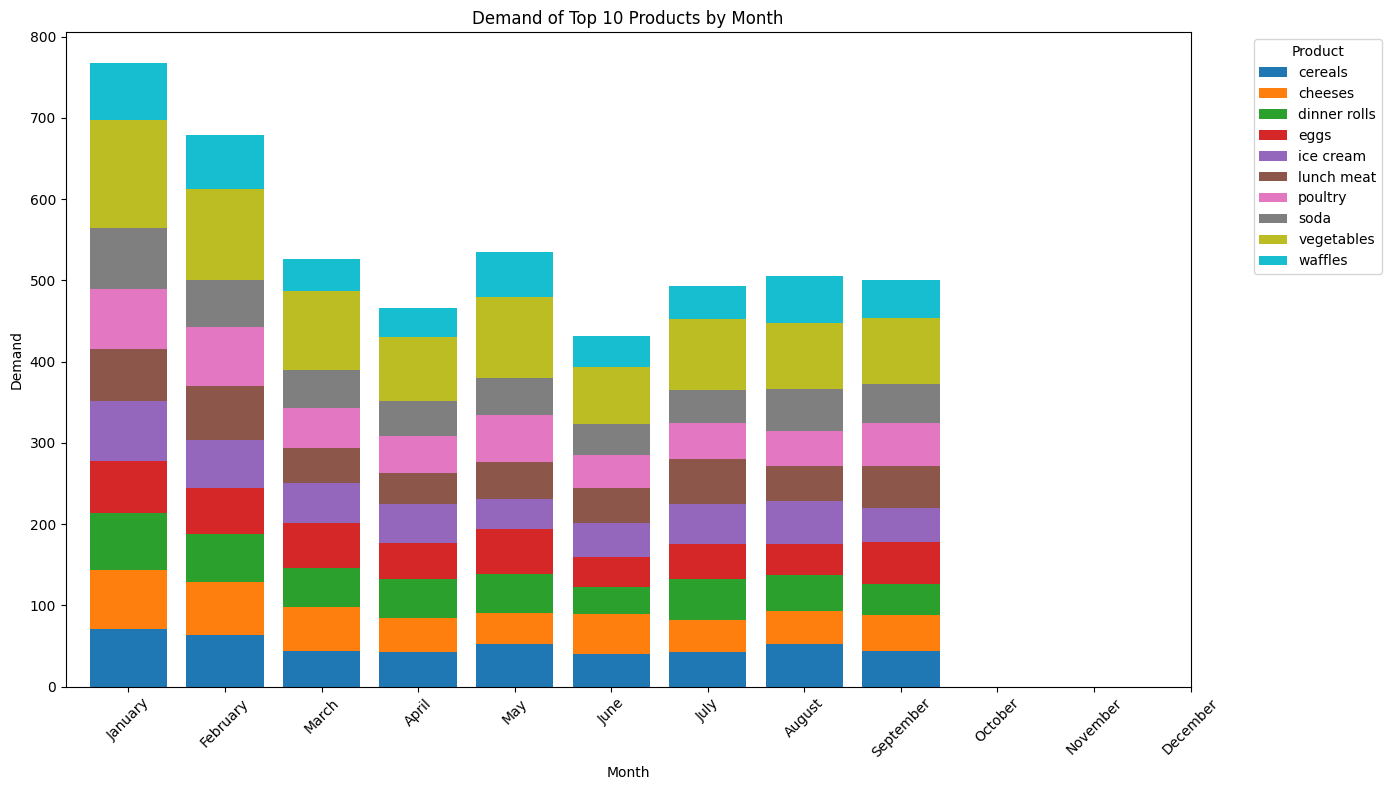

In [ ]:
# Extract the month from the Date column
df['Month'] = df['Date'].dt.month

# Define full month labels
month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Determine the top 10 products overall
top_products = df['Product'].value_counts().nlargest(10).index

# Filter data to include only the top 10 products
top_product_data = df[df['Product'].isin(top_products)]

# Group by month and product, then count the occurrences
top_product_demand_by_month = top_product_data.groupby(['Month', 'Product']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))
top_product_demand_by_month.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand of Top 10 Products by Month')
plt.xticks(range(12), month_labels, rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

INSIGHT FROM THE CHART ABOVE

Product-Specific Trends:

Vegetables: This is consistently in high demand across all months.
Soda: It also shows consistent demand in the first few months.
Lunch Meat and Poultry: Both show more demand in first two months, and then almost steady demand across all months.
Cereals and Bagels: These have more demand in the early months of the year. They represent a smaller portion of the demand but still significant.
Ice Cream: Demand is relatively lower but steady.

Monthly Variations:

January and February: The highest overall demand, with all top products contributing significantly.
March to June: Demand fluctuated, with June being the lowest.

July to September: Demand rises again a bit.
These insights can help in understanding which products are consistently in high demand and identify any seasonal trends or patterns. This information can be useful for inventory management, marketing strategies, and predicting future demand as well.


## Timeline Transactions Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


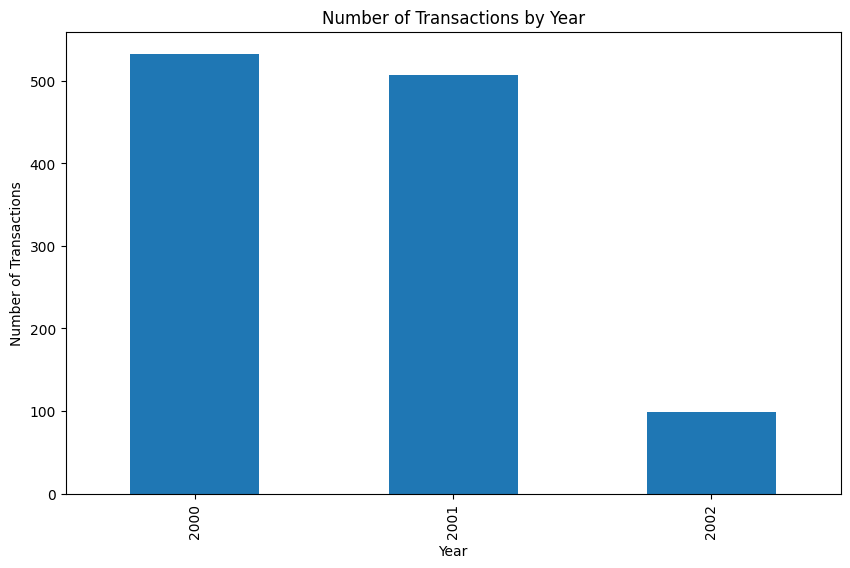

In [ ]:
# Creating chart to see transactions per year
df['Year'] = df['Date'].dt.year


# Count transactions by year
transactions_per_year = df.groupby('Year')['Transaction ID'].nunique()

#Creating a bar plot
plt.figure(figsize=(10, 6))
transactions_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Year')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


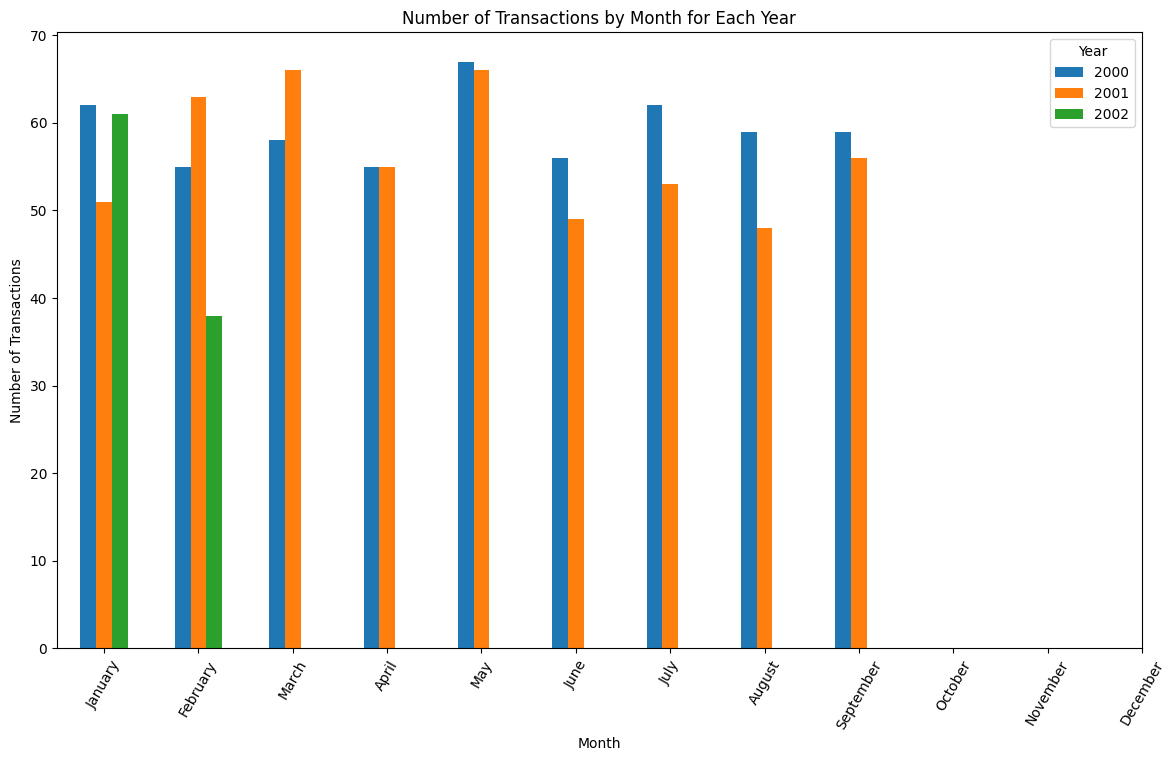

In [ ]:
# Extract the year and month from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Count the number of transactions per month for each year
transactions_per_month_year = df.groupby(['Year', 'Month'])['Transaction ID'].nunique().unstack(level=0)

# Define month labels
month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Plot the data
ax = transactions_per_month_year.plot(kind='bar', figsize=(14, 8))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Transactions by Month for Each Year')
ax.legend(title='Year')

# Set month labels on x-axis
ax.set_xticks(range(len(month_labels)))
ax.set_xticklabels(month_labels, rotation=60)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


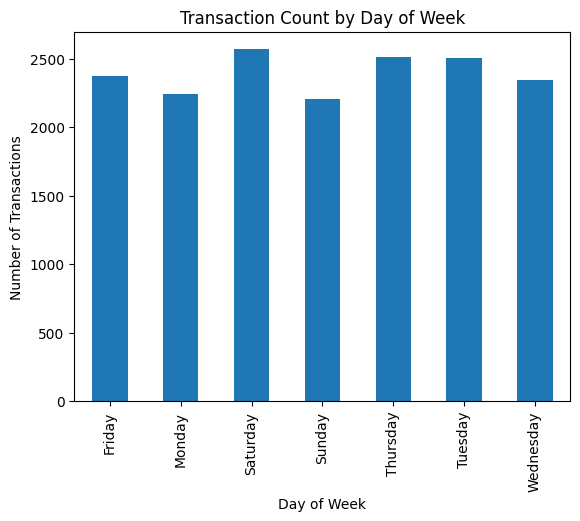

In [ ]:
# Creating new column 'DayOfWeek' extracting day from the 'Date' column using day_name() method
df['DayOfWeek'] = df['Date'].dt.day_name()


# Count transactions by day of week
day_counts = df['DayOfWeek'].value_counts().sort_index()

#Creating a bar plot of day_counts data
day_counts.plot(kind='bar')
plt.title('Transaction Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()

## Analyzing Product Categories

In [ ]:
# Finding the distinct products
Products = df['Product'].unique()
Products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['yogurt', 'pork', 'sandwich bags', 'lunch meat', 'all- purpose',
       'flour', 'soda', 'butter', 'vegetables', 'beef', 'aluminum foil',
       'dinner rolls', 'shampoo', 'mixes', 'soap', 'laundry detergent',
       'ice cream', 'toilet paper', 'hand soap', 'waffles', 'cheeses',
       'milk', 'dishwashing liquid/detergent', 'individual meals',
       'cereals', 'tortillas', 'spaghetti sauce', 'ketchup',
       'sandwich loaves', 'poultry', 'bagels', 'eggs', 'juice', 'pasta',
       'paper towels', 'coffee/tea', 'fruits', 'sugar'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


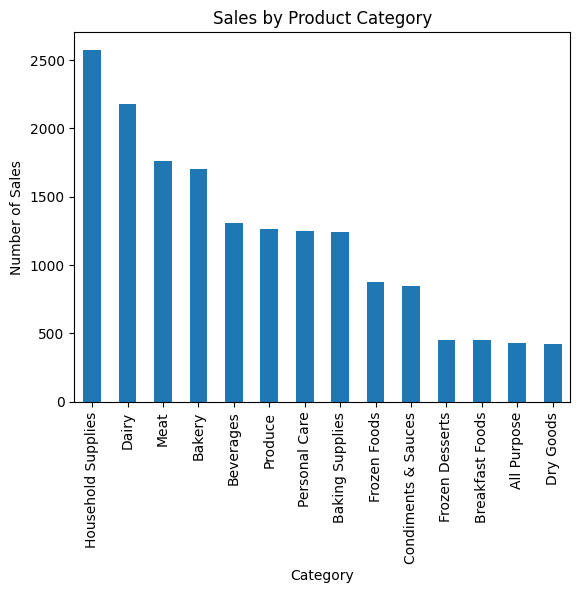

In [ ]:
# Creating a dictionary that maps the products to categories
category_mapping = {'yogurt': 'Dairy', 'pork': 'Meat', 'sandwich bags':'Household Supplies', 'lunch meat': 'Meat', 'all- purpose':'All Purpose',
       'flour': 'Baking Supplies', 'soda': 'Beverages', 'butter': 'Dairy', 'vegetables': 'Produce', 'beef': 'Meat', 'aluminum foil': 'Household Supplies',
       'dinner rolls': 'Bakery', 'shampoo': 'Personal Care', 'mixes': 'Baking Supplies', 'soap': 'Personal Care', 'laundry detergent': 'Household Supplies',
       'ice cream': 'Frozen Desserts', 'toilet paper': 'Household Supplies', 'hand soap': 'Personal Care', 'waffles': 'Frozen Foods', 'cheeses': 'Dairy',
       'milk': 'Dairy', 'dishwashing liquid/detergent': 'Household Supplies', 'individual meals': 'Frozen Foods',
       'cereals': 'Breakfast Foods', 'tortillas': 'Bakery', 'spaghetti sauce': 'Condiments & Sauces', 'ketchup': 'Condiments & Sauces',
       'sandwich loaves': 'Bakery', 'poultry': 'Meat', 'bagels': 'Bakery', 'eggs': 'Dairy', 'juice': 'Beverages', 'pasta': 'Dry Goods',
       'paper towels': 'Household Supplies', 'coffee/tea': 'Beverages', 'fruits': 'Produce', 'sugar': 'Baking Supplies'}

df['Category'] = df['Product'].map(category_mapping)

category_counts = df['Category'].value_counts()

category_counts.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.show()

In [ ]:
# Displaying the most common product categories
print("Top product categories:", ", ".join(category_counts.index[:4]))

Top product categories: Household Supplies, Dairy, Meat, Bakery


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MEANINGFUL INSIGHTS FROM THE BAR CHART ABOVE

•	Customer Preferences /Stock Management: The data reflects customer preferences, indicating which categories are essential and should be prioritized in stock and promotional strategies. Ensure high inventory levels for categories like Household Supplies and Dairy products which are in high demand, to meet demand and prevent them from being out of stock.    
•	Promotions: Consider targeted promotions or discounts for lower-selling categories like Dry Goods to boost their sales.     
•	Product Placement: Place top-selling items in prominent store locations to make them easily accessible to customers.

## Correlation Heatmaps between Products by Transactions

In [8]:
# Create a pivot table with Transaction ID as rows and Products as columns
basket = df.groupby(['Transaction ID', 'Product']).size().unstack(fill_value=0)

# Convert counts to binary values (0 or 1) If product is present set 1 else set 0
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Compute the correlation matrix
correlation_matrix = basket.corr()

correlation_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-92248048ccd5>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
Product,,,,,,,,,,,,,,,,,,,,,
all- purpose,1.000000,0.055167,0.023935,0.018439,0.041073,0.010845,0.008080,0.018866,0.040638,0.064380,...,0.058439,0.089885,0.011798,0.040018,0.045016,0.050193,0.030701,0.059246,0.084150,0.099903
aluminum foil,0.055167,1.000000,0.085966,0.066351,0.025727,0.057452,0.080917,0.055328,0.069022,0.040848,...,0.072903,0.047889,0.047627,0.054357,0.014847,0.060505,0.015349,0.124181,0.075108,0.124525
bagels,0.023935,0.085966,1.000000,0.050020,0.043044,0.041212,0.072043,0.024151,0.023150,0.076412,...,0.067755,-0.001874,0.027676,0.097701,0.051048,0.073950,0.084967,0.071786,0.033015,0.060009
beef,0.018439,0.066351,0.050020,1.000000,-0.041668,0.085013,0.056403,-0.003561,0.036918,0.049493,...,0.065957,0.074934,0.037818,0.077518,0.086557,0.065151,0.011915,0.067507,0.039615,0.073807
butter,0.041073,0.025727,0.043044,-0.041668,1.000000,0.018957,0.068285,0.015316,0.037477,0.027659,...,0.043382,0.037829,0.045896,0.055175,0.022014,0.065506,0.045745,0.054972,0.029164,-0.004212
cereals,0.010845,0.057452,0.041212,0.085013,0.018957,1.000000,0.083881,0.081193,0.072136,0.066256,...,0.054684,0.051594,0.006613,0.080609,0.057043,0.067889,0.053184,0.084234,0.019152,0.083283
cheeses,0.008080,0.080917,0.072043,0.056403,0.068285,0.083881,1.000000,0.082407,0.066155,0.049162,...,0.059335,0.060155,0.066907,0.081688,0.050302,0.083894,0.001931,0.094414,0.079458,0.092014
coffee/tea,0.018866,0.055328,0.024151,-0.003561,0.015316,0.081193,0.082407,1.000000,0.048173,0.027322,...,0.055140,0.063960,0.045321,0.014239,0.023043,0.054211,0.061189,0.043876,0.095173,0.062767
dinner rolls,0.040638,0.069022,0.023150,0.036918,0.037477,0.072136,0.066155,0.048173,1.000000,0.059461,...,0.110662,0.037038,0.080919,0.114323,0.101800,0.012506,0.060654,0.096454,0.067687,0.072724


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


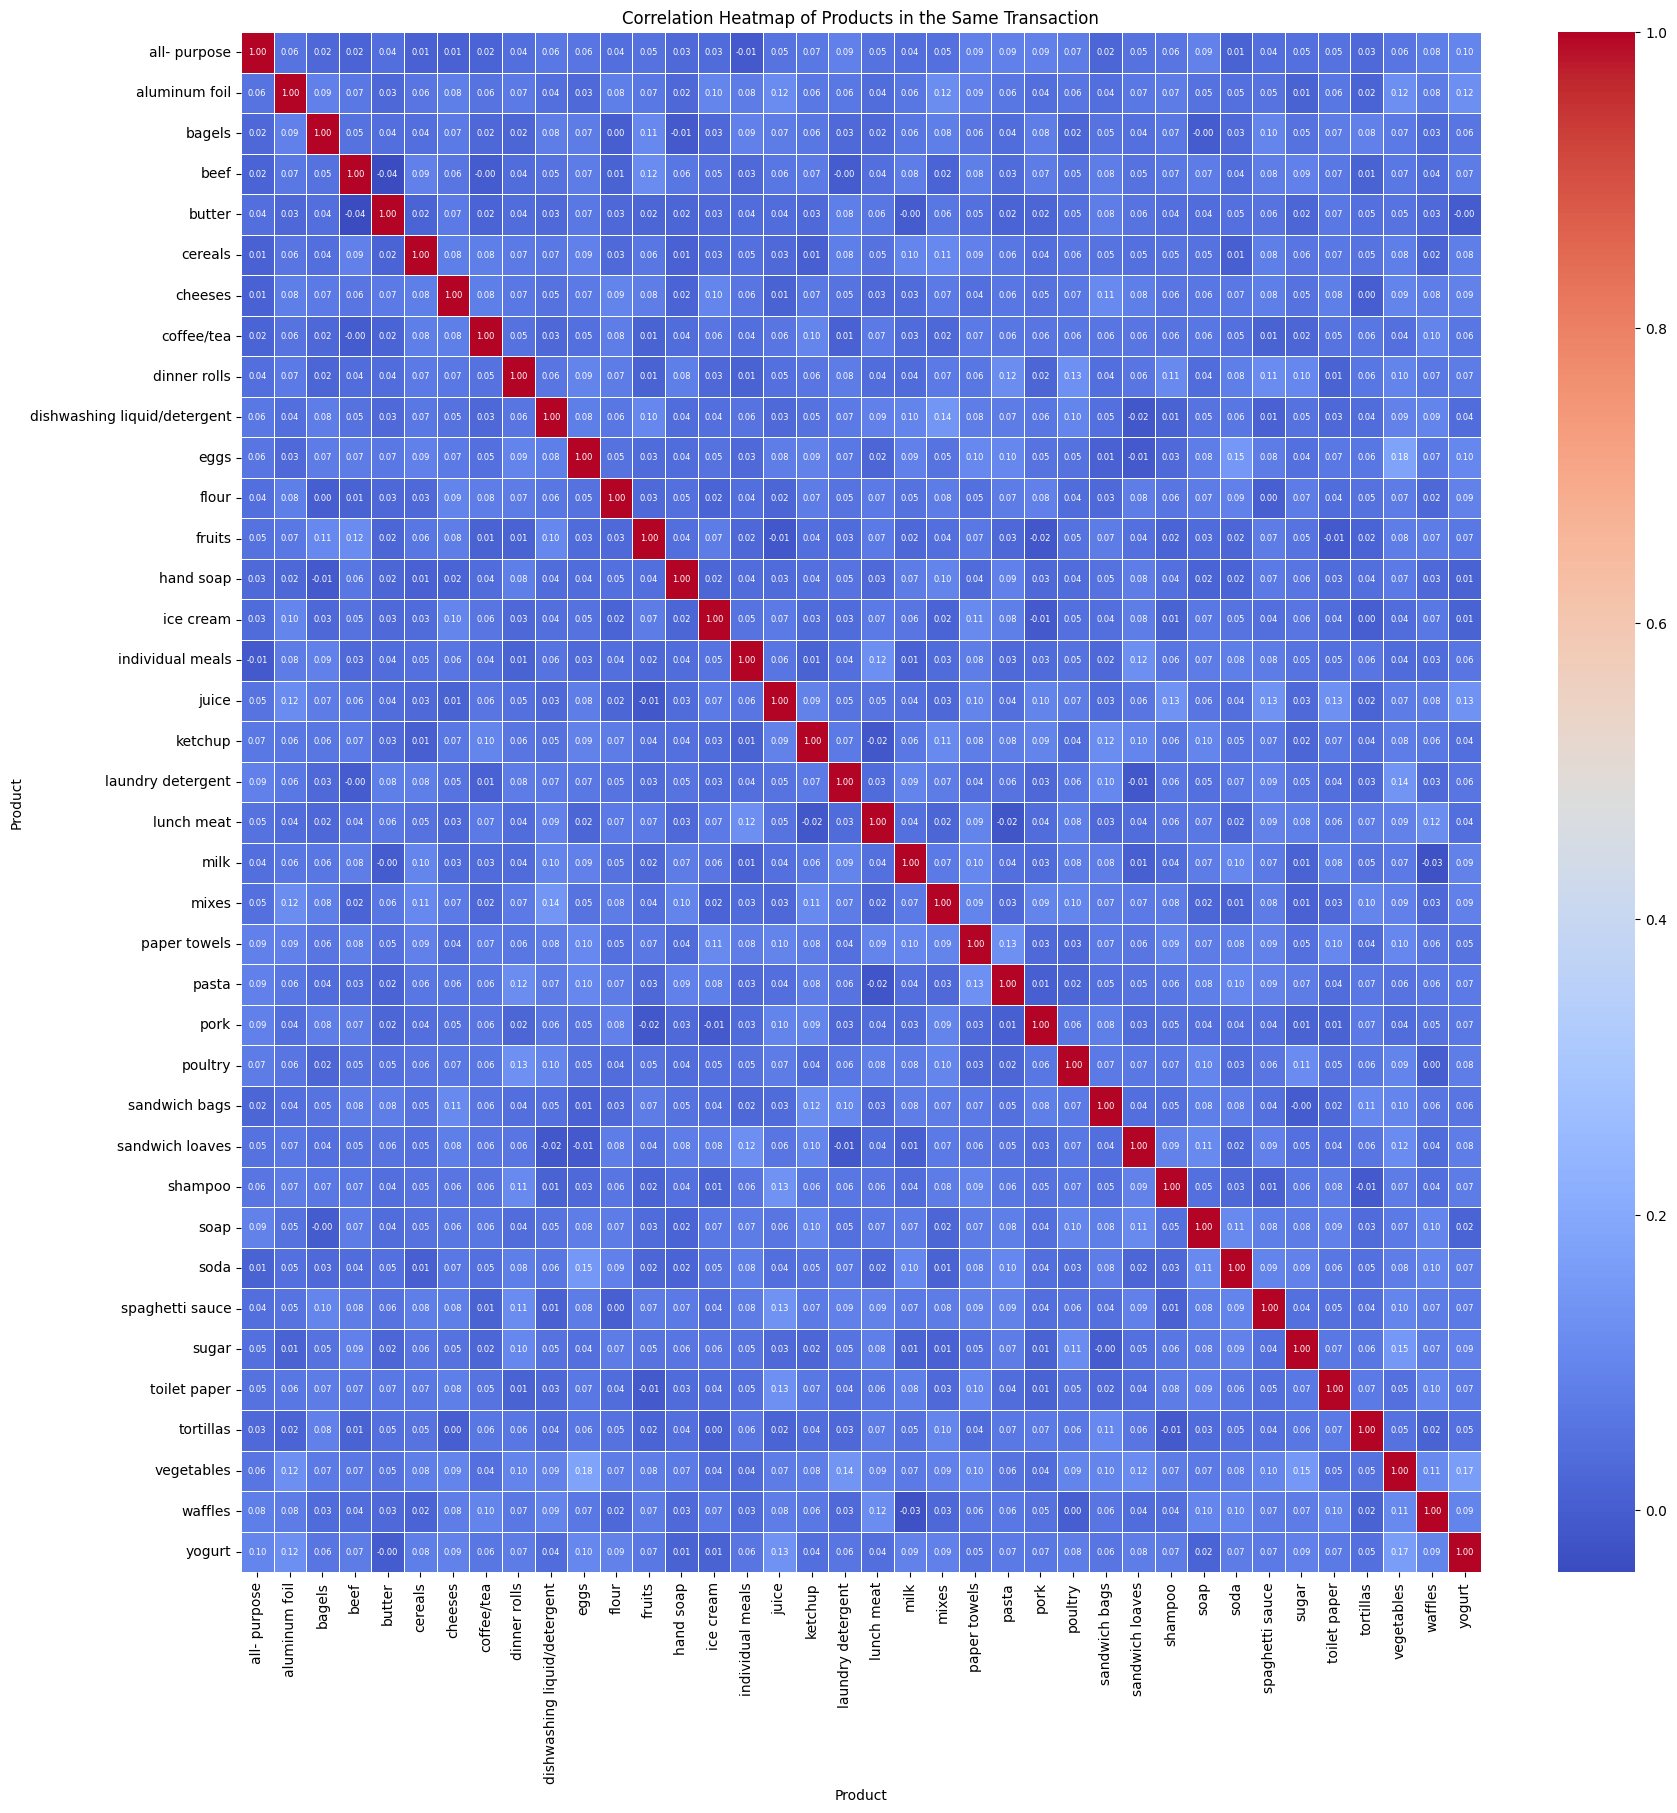

In [9]:
# Plot the heatmap with value information
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Heatmap of Products in the Same Transaction')
plt.show()

In [ ]:
# Excluding self-correlation. Correlation of column with itself is always and we want correlation betwen different products.
correlation_matrix.values[np.arange(correlation_matrix.shape[0]), np.arange(correlation_matrix.shape[1])] = np.nan

# Finding the maximum correlation value and its indices
max_corr = np.nanmax(correlation_matrix.values)
max_idx = np.where(correlation_matrix.values == max_corr)
max_idx = (max_idx[0][0], max_idx[1][0])

# Finding the minimum correlation value and its indices
min_corr = np.nanmin(correlation_matrix.values)
min_idx = np.where(correlation_matrix.values == min_corr)
min_idx = (min_idx[0][0], min_idx[1][0])

# Getting the column names corresponding to the indices
col1 = correlation_matrix.columns[max_idx[0]]
col2 = correlation_matrix.columns[max_idx[1]]
col3 = correlation_matrix.columns[min_idx[0]]
col4 = correlation_matrix.columns[min_idx[1]]

print("Maximum correlation:", max_corr)
print("Column pair:", (col1, col2))

print("Minimum correlation:", min_corr)
print("Column pair:", (col3, col4))

Maximum correlation: 0.17948746193396625
Column pair: ('eggs', 'vegetables')
Minimum correlation: -0.04166752899702475
Column pair: ('beef', 'butter')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Application of Data Modeling Techniques- Applying Apriori Algorithm (Market Basket Analysis)

In [10]:
# We are going to use Market Basket Analysis (MBA), to associate data of transactions, since the dataset is a list of ungrouped/unassociated data

# Group the products by Transaction ID
basket = df.groupby(['Transaction ID'])['Product'].apply(list).tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Encode the transactions. Using Data type int
transaction_encoder = TransactionEncoder()
te_ary = transaction_encoder.fit(basket).transform(basket)
df_group_by_transactions = pd.DataFrame(te_ary, columns=transaction_encoder.columns_, dtype='int')
df_group_by_transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,1,1,0,1,1,0,0,0,1,0,...,1,1,1,0,0,0,0,1,0,1
1,0,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,1,1,1,1
2,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,0,1,0,1,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1,0,0,1,0,1,1,1,1,1,...,1,1,0,0,1,0,0,0,0,0
1135,0,0,0,0,0,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
1136,0,0,1,1,0,0,0,0,1,1,...,1,1,0,0,1,0,1,1,0,1
1137,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,1,0,1,1,1


In [12]:
# Set a minimum support, We use a medium value support because the correlation heatmap has low correlation values.
#Low <= 0.10
#Medium <= 0.39
#High <= 0.79
#Strongest >= 0.8

min_support = 0.2

# Generate frequent itemsets
frequent_itemsets = apriori(df_group_by_transactions, min_support=min_support, use_colnames=True)

frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
70,0.297629,"(vegetables, sugar)"
71,0.289728,"(vegetables, toilet paper)"
72,0.283582,"(vegetables, tortillas)"
73,0.315189,"(vegetables, waffles)"


In [13]:
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets_sorted

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
35,0.739245,(vegetables)
25,0.421422,(poultry)
14,0.398595,(ice cream)
5,0.395961,(cereals)
19,0.395083,(lunch meat)
...,...,...
72,0.283582,"(vegetables, tortillas)"
65,0.282704,"(vegetables, sandwich loaves)"
49,0.276558,"(vegetables, flour)"
62,0.270413,"(vegetables, pork)"


In [17]:
frequent_itemsets.filter(items=['vegetables'])
frequent_itemsets.filter(items=['all-purpose'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


""
0
1
2
3
4
...
70
71
72
73


From the above analysis, Vegetable has the highest support of 0.739245 followed by poultry with support of 0.421422. This means that about 73.92% of all transactions consist of vegetable and 42.14% consists of poultry.

In [ ]:
# Set minimum confidence
min_confidence = 0.10

# Generate association rules using confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(all- purpose),(vegetables),0.374890,0.739245,0.289728,0.772834,1.045437,0.012592,1.147860,0.069527
1,(vegetables),(all- purpose),0.739245,0.374890,0.289728,0.391924,1.045437,0.012592,1.028013,0.166677
2,(vegetables),(aluminum foil),0.739245,0.384548,0.310799,0.420428,1.093304,0.026524,1.061907,0.327284
3,(aluminum foil),(vegetables),0.384548,0.739245,0.310799,0.808219,1.093304,0.026524,1.359651,0.138664
4,(bagels),(vegetables),0.385426,0.739245,0.300263,0.779043,1.053836,0.015339,1.180118,0.083124
...,...,...,...,...,...,...,...,...,...,...
69,(vegetables),(tortillas),0.739245,0.369622,0.283582,0.383610,1.037844,0.010341,1.022693,0.139840
70,(waffles),(vegetables),0.394205,0.739245,0.315189,0.799555,1.081583,0.023774,1.300878,0.124513
71,(vegetables),(waffles),0.739245,0.394205,0.315189,0.426366,1.081583,0.023774,1.056064,0.289272
72,(yogurt),(vegetables),0.384548,0.739245,0.319579,0.831050,1.124188,0.035304,1.543388,0.179492


In [ ]:
sorted_rules = rules.sort_values(by='confidence', ascending=False)
sorted_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(eggs),(vegetables),0.389816,0.739245,0.326602,0.837838,1.133370,0.038433,1.607989,0.192852
72,(yogurt),(vegetables),0.384548,0.739245,0.319579,0.831050,1.124188,0.035304,1.543388,0.179492
64,(sugar),(vegetables),0.360843,0.739245,0.297629,0.824818,1.115757,0.030878,1.488477,0.162319
36,(laundry detergent),(vegetables),0.378402,0.739245,0.309043,0.816705,1.104783,0.029311,1.422600,0.152582
54,(sandwich loaves),(vegetables),0.349429,0.739245,0.282704,0.809045,1.094421,0.024390,1.365533,0.132614
...,...,...,...,...,...,...,...,...,...,...
69,(vegetables),(tortillas),0.739245,0.369622,0.283582,0.383610,1.037844,0.010341,1.022693,0.139840
55,(vegetables),(sandwich loaves),0.739245,0.349429,0.282704,0.382423,1.094421,0.024390,1.053424,0.330866
23,(vegetables),(flour),0.739245,0.352941,0.276558,0.374109,1.059976,0.015648,1.033821,0.216995
26,(vegetables),(hand soap),0.739245,0.345917,0.270413,0.365796,1.057465,0.014695,1.031344,0.208404


In [ ]:
# Generate association rules using lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_confidence)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(all- purpose),(vegetables),0.374890,0.739245,0.289728,0.772834,1.045437,0.012592,1.147860,0.069527
1,(vegetables),(all- purpose),0.739245,0.374890,0.289728,0.391924,1.045437,0.012592,1.028013,0.166677
2,(vegetables),(aluminum foil),0.739245,0.384548,0.310799,0.420428,1.093304,0.026524,1.061907,0.327284
3,(aluminum foil),(vegetables),0.384548,0.739245,0.310799,0.808219,1.093304,0.026524,1.359651,0.138664
4,(bagels),(vegetables),0.385426,0.739245,0.300263,0.779043,1.053836,0.015339,1.180118,0.083124
...,...,...,...,...,...,...,...,...,...,...
69,(vegetables),(tortillas),0.739245,0.369622,0.283582,0.383610,1.037844,0.010341,1.022693,0.139840
70,(waffles),(vegetables),0.394205,0.739245,0.315189,0.799555,1.081583,0.023774,1.300878,0.124513
71,(vegetables),(waffles),0.739245,0.394205,0.315189,0.426366,1.081583,0.023774,1.056064,0.289272
72,(yogurt),(vegetables),0.384548,0.739245,0.319579,0.831050,1.124188,0.035304,1.543388,0.179492


In [ ]:
sorted_rules = rules.sort_values(by='confidence', ascending=False)
sorted_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(eggs),(vegetables),0.389816,0.739245,0.326602,0.837838,1.133370,0.038433,1.607989,0.192852
72,(yogurt),(vegetables),0.384548,0.739245,0.319579,0.831050,1.124188,0.035304,1.543388,0.179492
64,(sugar),(vegetables),0.360843,0.739245,0.297629,0.824818,1.115757,0.030878,1.488477,0.162319
36,(laundry detergent),(vegetables),0.378402,0.739245,0.309043,0.816705,1.104783,0.029311,1.422600,0.152582
54,(sandwich loaves),(vegetables),0.349429,0.739245,0.282704,0.809045,1.094421,0.024390,1.365533,0.132614
...,...,...,...,...,...,...,...,...,...,...
69,(vegetables),(tortillas),0.739245,0.369622,0.283582,0.383610,1.037844,0.010341,1.022693,0.139840
55,(vegetables),(sandwich loaves),0.739245,0.349429,0.282704,0.382423,1.094421,0.024390,1.053424,0.330866
23,(vegetables),(flour),0.739245,0.352941,0.276558,0.374109,1.059976,0.015648,1.033821,0.216995
26,(vegetables),(hand soap),0.739245,0.345917,0.270413,0.365796,1.057465,0.014695,1.031344,0.208404


In [ ]:
rules[['support', 'confidence', 'lift']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,confidence,lift
count,74.000000,74.000000,74.000000
mean,0.297179,0.594546,1.064719
std,0.014066,0.194784,0.025607
min,0.270413,0.365796,1.027191
25%,0.289728,0.399347,1.051773
50%,0.294996,0.604138,1.061029
75%,0.308165,0.784166,1.075819
max,0.331870,0.837838,1.133370


--COUNT: There are 74 association rules in the dataset).

--MEAN: The average support and confidence are 0.297179 and	0.594546 respectively. Lift is approximately 1.06, indicating a positive association.

--STANDARD DEVIATION: There is low variation of 0.025607 in lift values across the rules.

--MINIMUM: The lowest lift value among the rules is 1.027191, approximately 1.03, indicating the rules have a positive association, because it is greater that 1

--25th Percentile (25%): 1.051773 (25% of the rules have a lift of 1.05 or lower).

--50th Percentile (Median): 1.061029 (50% of the rules have a lift of 1.06 or lower).

--75th Percentile (75%): 1.075819 (75% of the rules have a lift of 1.08 or lower).

--MAXIMUM: The highest lift value among the rules is 1.133370, approximately 1.13, indicating the strongest positive association.


In [ ]:
# Sort the itemsets by support
sorted_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Inspect the top 10 itemsets
top_10_itemsets = sorted_itemsets.head(10)

print("Top 10 Frequent Itemsets by Support:")
print(top_10_itemsets)

Top 10 Frequent Itemsets by Support:
     support        itemsets
35  0.739245    (vegetables)
25  0.421422       (poultry)
14  0.398595     (ice cream)
5   0.395961       (cereals)
19  0.395083    (lunch meat)
36  0.394205       (waffles)
30  0.390694          (soda)
6   0.390694       (cheeses)
10  0.389816          (eggs)
8   0.388938  (dinner rolls)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Inspect the least 10 itemsets
least_10_itemsets = sorted_itemsets.tail(10)
least_10_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
45,0.289728,"(coffee/tea, vegetables)"
66,0.287972,"(vegetables, shampoo)"
61,0.286216,"(pasta, vegetables)"
53,0.285338,"(individual meals, vegetables)"
42,0.283582,"(butter, vegetables)"
72,0.283582,"(tortillas, vegetables)"
65,0.282704,"(sandwich loaves, vegetables)"
49,0.276558,"(flour, vegetables)"
62,0.270413,"(vegetables, pork)"
51,0.270413,"(vegetables, hand soap)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


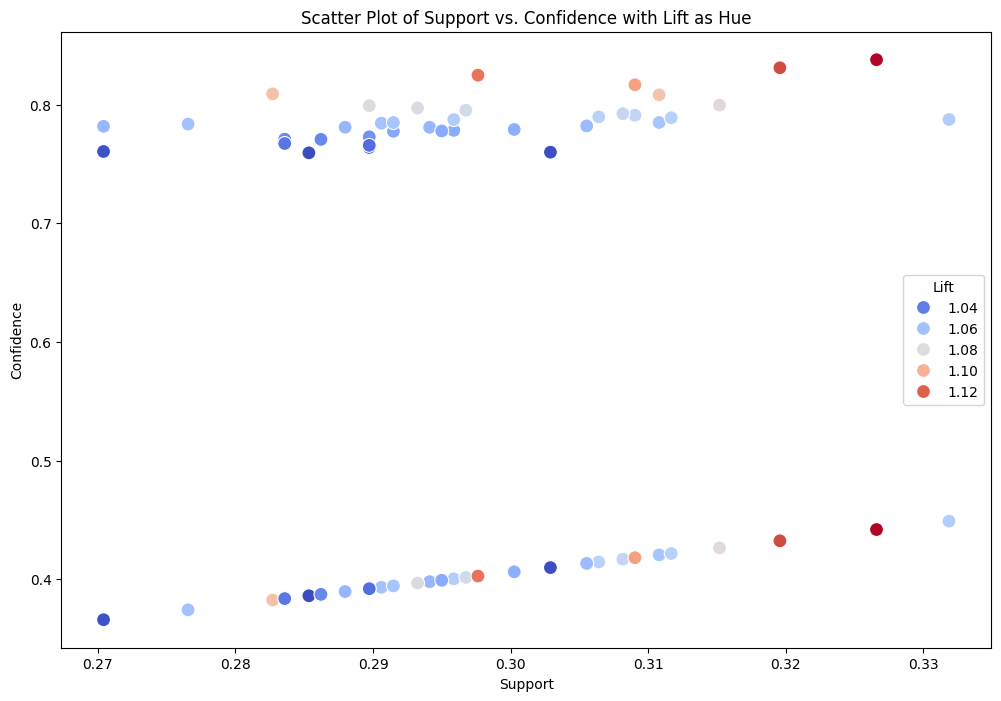

In [ ]:
# Plot the scatter plot with hue for lift
# - Support (X-axis): Represents the frequency of the items in the dataset, higher values indicate the product is present frequently in the transactions.
# - Confidence (Y-axis): Represents the ratio of number of transactions when the antecedent and consequent products are present, higher values indicate how strong the rule is.
# - Lift (Hue): Represents how positive the association is between the antecedent and consequent product.
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='support', y='confidence', hue='lift', data=rules, palette='coolwarm', s=100)
plt.title('Scatter Plot of Support vs. Confidence with Lift as Hue')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


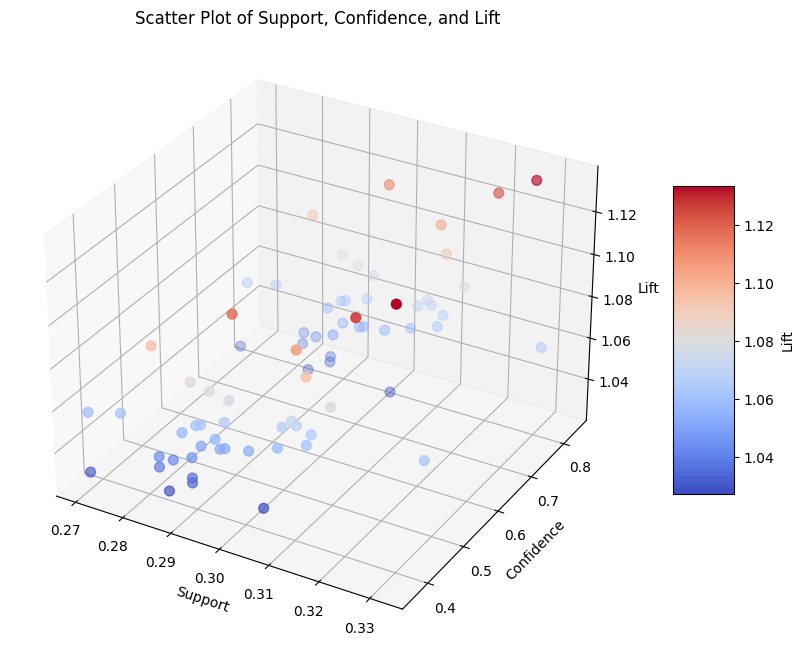

In [ ]:
# Extract support, confidence, and lift from rules array
supports = rules['support']
confidences = rules['confidence']
lifts = rules['lift']

# Create scatter plot chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(supports, confidences, lifts, c=lifts, cmap='coolwarm', s=50)

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Lift')

# Set labels
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
ax.set_title('Scatter Plot of Support, Confidence, and Lift')

plt.show()

In [ ]:
# Sort rules by lift and get the top 5 rules
top5_rules = rules.sort_values(by='lift', ascending=False).head(5)

#Inspect the top 5 rules
top5_rules =top5_rules.head(5)
print("Top 5 rules by lift: ")
print(top5_rules)


Top 5 rules by lift: 
     antecedents   consequents  antecedent support  consequent support  \
20        (eggs)  (vegetables)            0.389816            0.739245   
21  (vegetables)        (eggs)            0.739245            0.389816   
73  (vegetables)      (yogurt)            0.739245            0.384548   
72      (yogurt)  (vegetables)            0.384548            0.739245   
65  (vegetables)       (sugar)            0.739245            0.360843   

     support  confidence      lift  leverage  conviction  zhangs_metric  
20  0.326602    0.837838  1.133370  0.038433    1.607989       0.192852  
21  0.326602    0.441805  1.133370  0.038433    1.093139       0.451287  
73  0.319579    0.432304  1.124188  0.035304    1.084123       0.423650  
72  0.319579    0.831050  1.124188  0.035304    1.543388       0.179492  
65  0.297629    0.402613  1.115757  0.030878    1.069921       0.397873  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


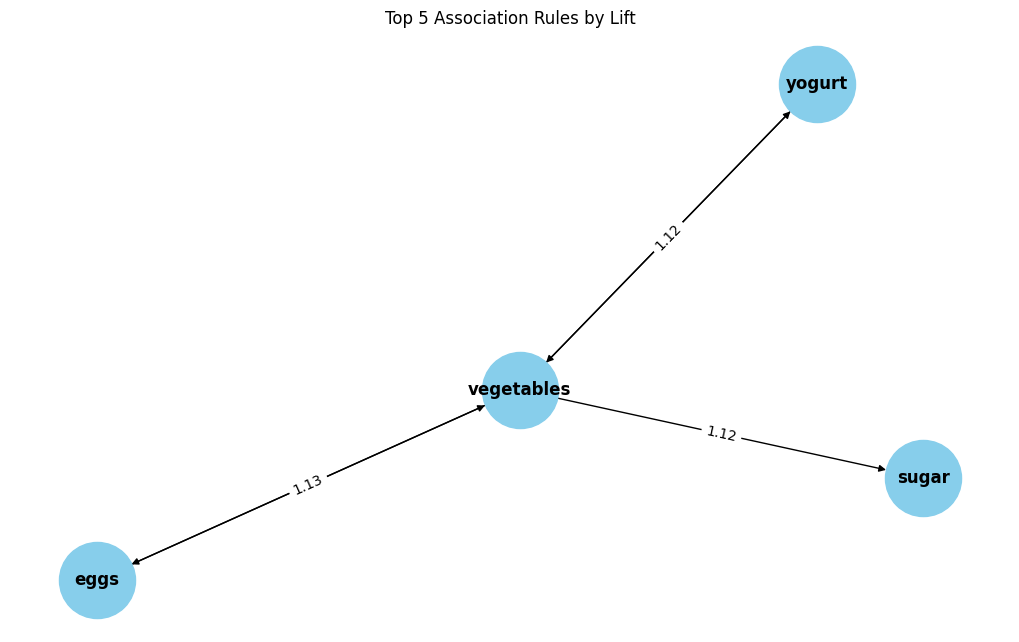

In [ ]:
import networkx as nx
#Sort the rules by lift and select the top 5
top_rules = rules.sort_values(by='lift', ascending=False).head(5)

# Plot the top 5 rules using networkx and matplotlib
G = nx.DiGraph()

for i, row in top_rules.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G.add_edge(antecedents, consequents, weight=row['lift'])

pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(edge[0], edge[1]): f"{edge[2]['weight']:.2f}" for edge in edges})
plt.title('Top 5 Association Rules by Lift')
plt.show()

#Summary Report




#Methodology
Data Collection: The transactional data is a CSV file containing
columns for Date, Transaction ID, and Product.

Data Preparation: Python Libraries such as pandas, numpy, mlxtend, matplotlib, seaborn, and statsmodels were imported for this analysis.
The dataset was loaded into a pandas DataFrame.

#Analysis Summary

1) We performed Data engineering covering data cleaning and correlations.  
2) Feature Engineering was done by transforming the date column and handling categorical data (product) with One -Hot encoder using mlxtend's Transaction Encoder.

3) For Modeling, we applied the Apriori Algorithm:

The Frequent itemsets analysis was based on a minimum support threshold of 0.2 following the result of the earlier correlation, which showed low correlation in the data set. The Frequent itemset analysis revealed the most frequently purchased products.

Generating Association Rules: Association rules were derived
from the frequent itemsets using support, confidence, and
lift metrics. These rules highlighted product relationships, showing which items were often purchased both alone and together.

4) Visualization: Visualizations including bar charts, network graphs and scatter plots were created using matplotlib and seaborn to represent the findings.


#Challenges Faced
One major challenge the team faced was deciding on the appropriate thresold to apply for the minimum support for the frequent itemsets. The challenge was to ensure threshold applied captured as much transactions as possible without losing insights from the data set. We resolved the challenge by reviewing the results from the earlier Correlation analysis.



#Conclusion

The market-basket analysis, has provided valuable insights into product associations as well as customers' buying patterns.

The strongest product association we observed is between Eggs and Vegetables which is validated by them having the highest "Lift" value of 1.133370. This insight suggest that these item pair are most frequently bought together. The next highest paired products are Vegetables and Yogurt also having high "Lift" value of 1.124188. The third pair is sugar and Vegetables.

The confidence values also provide the probability of the consequent item(s) being purchased given that the antecedent item(s) were purchased highlighting reliable buying patterns.

The high support values present also provide further insights that the item combinations are most common in the dataset, and have the highest representation, accounting for a significant portion of transactions.


#Recommendations

From the analysis above, looking at the sorted association rule generated above, we can therefore make the following recommendations:
1.	Customer Buying Behavior: It is evident that there is strong associations between certain product pairs. Looking at the Sorted_rules dataframe, the first row shows confidence of 0.831050. This means 83.78% of the transactions that contain eggs, also contain vegetables while the second row shows yogurt and vegetable has a confidence of 0.831050. This insight can be leveraged for targeted marketing campaigns and promotions like offering bundle promotions or discounts for purchasing these items together. For example, "Buy eggs and get 15% off on vegetables."
2.	Inventory Management: Since items like Eggs and Vegetables are frequently purchased together, ensuring that these products are stocked together in enough quantity can improve the shopping experience (We also recommended placing them in visible areas so customers can easily locate and pick them together) and eliminate out of stock situation.
3.	Cross-Selling Opportunities: Cross-selling opportunities are also identified due to the associations provided. Special offers and also placing products strategically in the store to encourage the purchase of related items, to improve customer satisfaction and increase sales.
4.	Profit Optimization: By leveraging the insights from the association rules, can enhance promotional strategies and optimize product placements to boost sales and profitability. For instance, promoting high-margin items that are frequently bought with other products can increase overall profits.

In summary, these findings can help enhance customer satisfaction, improve inventory management, and increase sales through effective cross-selling strategies. By implementing these recommendations, the store can optimize operations and achieve improved profitability.